In [1]:
import pandas as pd
import scanpy as sc
import numpy as np

def cluster_avg_expr(adata,clustering):
    cluster_avg_subset = pd.DataFrame(columns=adata.var_names, index=adata.obs[clustering].cat.categories)                                                                                                 
    for clust in adata.obs[clustering].cat.categories: 
        cluster_avg_subset.loc[clust] = adata[adata.obs[clustering].isin([clust]),:].X.sum(0)


    cluster_avg_subset = cluster_avg_subset.astype('float')
    cluster_avg_subset = cluster_avg_subset.T
    return(cluster_avg_subset)



In [2]:
sample = 'iGlut_post'
adata1 = sc.read_h5ad("/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/scanpy/"+sample+"_dr_clustered_raw_merged.h5ad")

sc_meta_post = pd.read_csv("/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/scanpy/"+sample+"_dr_clustered_raw_merged_meta.tsv",sep="\t",index_col=0)
sc_meta_post.head()

,sample,species,gene_count,tscp_count,mread_count,bc1_well,bc2_well,bc3_well,bc1_wind,bc2_wind,...,M_CHIR,M_RA,M_FGF8,M_BMP4,M_SHH,M_PM,tSNE_1,tSNE_2,umap_1,umap_2
01_01_02__s1,iGlut_post_p1,hg38,3542,9141,11365,A1,A1,A2,1,1,...,0.0,0,0,50,0,0,0.542512,39.629030,-1.988116,7.912624
01_01_12__s1,iGlut_post_p1,hg38,1176,1940,2390,A1,A1,A12,1,1,...,0.0,0,0,50,0,0,6.332805,39.521160,-3.288275,8.063947
01_01_16__s1,iGlut_post_p1,hg38,3393,8576,10612,A1,A1,B4,1,1,...,0.0,0,0,50,0,0,28.295320,26.426134,-1.621965,-1.320243
01_01_22__s1,iGlut_post_p1,hg38,2650,5700,7061,A1,A1,B10,1,1,...,0.0,0,0,50,0,0,42.816700,21.352268,-1.820428,-2.448944
01_01_55__s1,iGlut_post_p1,hg38,1970,3873,4844,A1,A1,E7,1,1,...,0.0,0,0,50,0,0,19.640999,-2.478396,3.294251,-1.841123


In [3]:
adata1.obs = sc_meta_post.loc[adata1.obs.index]

In [4]:
adata1.obs['parse_id'] = adata1.obs['parse_id'].astype('category')

In [5]:
parse_id_sum_expr = cluster_avg_expr(adata1,'parse_id')
parse_id_sum_expr_post = parse_id_sum_expr.copy()

In [6]:
sample = 'iGlut_pre'
adata1 = sc.read_h5ad("/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/scanpy/"+sample+"_dr_clustered_raw_merged.h5ad")

In [7]:
sc_meta_post = pd.read_csv("/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/scanpy/"+sample+"_dr_clustered_raw_merged_meta.tsv",sep="\t",index_col=0)
sc_meta_post.head()

,sample,species,gene_count,tscp_count,mread_count,bc1_well,bc2_well,bc3_well,bc1_wind,bc2_wind,...,M_CHIR,M_RA,M_FGF8,M_BMP4,M_SHH,M_PM,tSNE_1,tSNE_2,umap_1,umap_2
01_01_41__s1,iGlut_pre,hg38,1456,2184,2946,A1,A1,D5,1,1,...,0.0,0,0,50,0,0,10.189884,39.231434,13.276781,-0.856798
01_01_68__s1,iGlut_pre,hg38,1693,2776,3762,A1,A1,F8,1,1,...,0.0,0,0,50,0,0,25.132082,32.402280,14.830362,5.908925
01_01_76__s1,iGlut_pre,hg38,1454,2196,2981,A1,A1,G4,1,1,...,0.0,0,0,50,0,0,5.797632,52.208040,16.393394,-1.702099
01_01_83__s1,iGlut_pre,hg38,2391,4048,5592,A1,A1,G11,1,1,...,0.0,0,0,50,0,0,6.855360,43.492870,13.618956,-2.668232
01_01_92__s1,iGlut_pre,hg38,769,1076,1503,A1,A1,H8,1,1,...,0.0,0,0,50,0,0,25.081343,29.805347,14.698254,5.868345


In [8]:
adata1.obs

,sample,species,gene_count,tscp_count,mread_count,bc1_well,bc2_well,bc3_well,bc1_wind,bc2_wind,...,outlier,mt_outlier,doublet_score,predicted_doublet,leiden_4,leiden_10,merged_clusters,final_clustering,final_clustering_reset,merged_clusters_from_10
01_01_41__s1,iGlut_pre,hg38,1456,2184,2946,A1,A1,D5,1,1,...,False,False,0.066084,False,51,72,24,106,24,24
01_01_68__s1,iGlut_pre,hg38,1693,2776,3762,A1,A1,F8,1,1,...,False,False,0.014155,False,5,52,2,22,2,2
01_01_76__s1,iGlut_pre,hg38,1454,2196,2981,A1,A1,G4,1,1,...,False,False,0.052849,False,39,103,65,94,65,65
01_01_83__s1,iGlut_pre,hg38,2391,4048,5592,A1,A1,G11,1,1,...,False,False,0.031383,False,51,72,24,106,24,24
01_01_92__s1,iGlut_pre,hg38,769,1076,1503,A1,A1,H8,1,1,...,False,False,0.010777,False,5,52,2,22,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96_95_70__s3,iGlut_pre,hg38,2652,4688,6317,H12,H11,F10,96,95,...,False,False,0.099955,False,29,41,93,68,93,93
96_95_72__s3,iGlut_pre,hg38,1002,1300,1765,H12,H11,F12,96,95,...,False,False,0.014229,False,16,10,69,88,69,69
96_95_78__s3,iGlut_pre,hg38,1431,2059,2782,H12,H11,G6,96,95,...,False,False,0.019288,False,16,98,66,57,66,66
96_95_79__s3,iGlut_pre,hg38,1058,1492,2074,H12,H11,G7,96,95,...,False,False,0.003151,False,37,59,29,85,29,29


In [9]:
sc_meta_post['final_clustering'] = adata1.obs.loc[sc_meta_post.index,'final_clustering']

In [92]:
sc_meta_post.to_csv("/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/scanpy/"+sample+"_dr_clustered_raw_merged_meta_fixed.tsv",sep="\t")

In [10]:
adata1.obs = sc_meta_post.loc[adata1.obs.index]
adata1.obs['parse_id'] = adata1.obs['parse_id'].astype('category')

In [11]:
parse_id_sum_expr = cluster_avg_expr(adata1,'parse_id')

In [12]:
parse_id_sum_expr_pre = parse_id_sum_expr.copy()

In [13]:
parse_id_sum_expr_all = pd.merge(parse_id_sum_expr_post,parse_id_sum_expr_pre,left_index=True,right_index=True)

In [14]:
selected_parse_exps = ['p1_D4','p1_D8','p1_D10','p1_B4','p1_B8','p1_B10','p3_C2','p3_F2','p3_D1','p3_F4','p3_G1','p3_G10']

In [15]:
parse_id_sum_expr_all_sel = parse_id_sum_expr_all[selected_parse_exps].copy()

In [16]:
meta = pd.DataFrame(index=parse_id_sum_expr_all_sel.columns)

In [17]:
meta['genotype'] = 'single_cell'
meta['repl'] = '1'

In [18]:
sample2ID = {
    '1': 'p1_D4',
    '2': 'p1_D8',
    '3': 'p1_D10',
    '4': 'p1_B4',
    '5': 'p1_B8',
    '6': 'p1_B10',
    '7': 'p3_C2',
    '8': 'p3_F2',
    '9': 'p3_D1',
    '10': 'p3_F4',
    '11': 'p3_G1',
    '12': 'p3_G10'}


In [19]:
for x in sample2ID.keys():
    meta.loc[sample2ID[x],'sample'] =x 

In [20]:
bulk_exp = pd.read_csv("bulk/reproducibility_genotypes.tsv",sep="\t",index_col=0)
bulk_meta = pd.read_csv("bulk/reproducibility_genotypes_meta.tsv",sep="\t",index_col=0)

In [21]:
merged_exp = pd.merge(bulk_exp,parse_id_sum_expr_all_sel,left_index=True,right_index=True)

In [22]:
merged_meta = pd.concat([bulk_meta,meta])

In [23]:
merged_exp.to_csv("bulk/reproducibility_genotypes_wSC.tsv",sep="\t")
merged_meta.to_csv("bulk/reproducibility_genotypes_wSC_meta.tsv",sep="\t")

In [57]:
adata1.obs.columns

Index(['sample', 'species', 'gene_count', 'tscp_count', 'mread_count',
       'bc1_well', 'bc2_well', 'bc3_well', 'bc1_wind', 'bc2_wind', 'bc3_wind',
       'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts',
       'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt',
       'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo',
       'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'percent_mito',
       'n_counts', 'outlier', 'mt_outlier', 'doublet_score',
       'predicted_doublet', 'leiden_4', 'leiden_10', 'merged_clusters_from_10',
       'plateID', 'parse_id', 'AP_axis', 'DV_axis', 'Basal_media',
       'final_clustering', 'CycA', 'M_XAV', 'M_CHIR', 'M_RA', 'M_FGF8',
       'M_BMP4', 'M_SHH', 'M_PM', 'tSNE_1', 'tSNE_2', 'umap_1', 'umap_2'],
      dtype='object')

In [78]:
adata1.obs

,sample,species,gene_count,tscp_count,mread_count,bc1_well,bc2_well,bc3_well,bc1_wind,bc2_wind,...,M_CHIR,M_RA,M_FGF8,M_BMP4,M_SHH,M_PM,tSNE_1,tSNE_2,umap_1,umap_2
01_01_41__s1,iGlut_pre,hg38,1456,2184,2946,A1,A1,D5,1,1,...,0.0,0,0,50,0,0,10.189884,39.231434,13.276781,-0.856798
01_01_68__s1,iGlut_pre,hg38,1693,2776,3762,A1,A1,F8,1,1,...,0.0,0,0,50,0,0,25.132082,32.402280,14.830362,5.908925
01_01_76__s1,iGlut_pre,hg38,1454,2196,2981,A1,A1,G4,1,1,...,0.0,0,0,50,0,0,5.797632,52.208040,16.393394,-1.702099
01_01_83__s1,iGlut_pre,hg38,2391,4048,5592,A1,A1,G11,1,1,...,0.0,0,0,50,0,0,6.855360,43.492870,13.618956,-2.668232
01_01_92__s1,iGlut_pre,hg38,769,1076,1503,A1,A1,H8,1,1,...,0.0,0,0,50,0,0,25.081343,29.805347,14.698254,5.868345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96_95_70__s3,iGlut_pre,hg38,2652,4688,6317,H12,H11,F10,96,95,...,0.0,100,100,0,500,0,26.189531,-0.466081,7.243571,9.774128
96_95_72__s3,iGlut_pre,hg38,1002,1300,1765,H12,H11,F12,96,95,...,0.0,100,100,0,500,0,19.055399,-34.620110,1.261871,12.298927
96_95_78__s3,iGlut_pre,hg38,1431,2059,2782,H12,H11,G6,96,95,...,0.0,100,100,0,500,0,23.398947,-35.231262,1.801108,12.387021
96_95_79__s3,iGlut_pre,hg38,1058,1492,2074,H12,H11,G7,96,95,...,0.0,100,100,0,500,0,14.534228,-0.506793,6.743062,10.416623


In [58]:
adata1.obs['merged_clusters_from_10'] = adata1.obs['merged_clusters_from_10'].astype('category')
cluster_avg = cluster_avg_expr(adata1,'merged_clusters_from_10')

In [79]:
adata1.obs['final_clustering'] = adata1.obs['final_clustering'].astype('category')
cluster_avg = cluster_avg_expr(adata1,'final_clustering')

In [80]:
cluster_avg_CPM = cluster_avg/cluster_avg.sum()*1e6
cluster_avg_logCPM = np.log1p(cluster_avg_CPM)

In [81]:
marker_genes = pd.read_csv("/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/marker_genes/iGlut_pre_dr_clustered_raw_merged_markers.tsv",sep="\t",index_col=0)

marker_genes_pos = marker_genes.loc[marker_genes['logfoldchanges']>0].copy()
marker_genes_pos = marker_genes_pos.loc[marker_genes_pos['pvals_adj']<0.05]
marker_genes_pos_sig = marker_genes_pos.loc[marker_genes_pos['logfoldchanges']>2]

genes_for_heatmap = list(marker_genes_pos.groupby('cluster').head(n=20).index)


In [82]:
marker_genes_pos

,scores,pvals,pvals_adj,logfoldchanges,cluster,fcluster,cluster_old
BOC,69.443950,0.000000,0.000000,2.953943,0,0,0
MIR99AHG,60.817980,0.000000,0.000000,2.048046,0,0,0
HOXD3,60.788260,0.000000,0.000000,4.283298,0,0,0
RFX4,54.793470,0.000000,0.000000,2.647338,0,0,0
PRTG,54.129130,0.000000,0.000000,1.525106,0,0,0
...,...,...,...,...,...,...,...
MAGED1,2.978668,0.002895,0.048924,0.117719,114,114,114
NETO2,2.975626,0.002924,0.049370,0.132684,114,114,114
DTNBP1,2.974293,0.002937,0.049558,0.225376,114,114,114
SYS1-DBNDD2,2.972491,0.002954,0.049836,0.768933,114,114,114


In [83]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [84]:
genes_for_heatmap_sig = list(marker_genes_pos_sig.groupby('cluster').head(n=20).index)


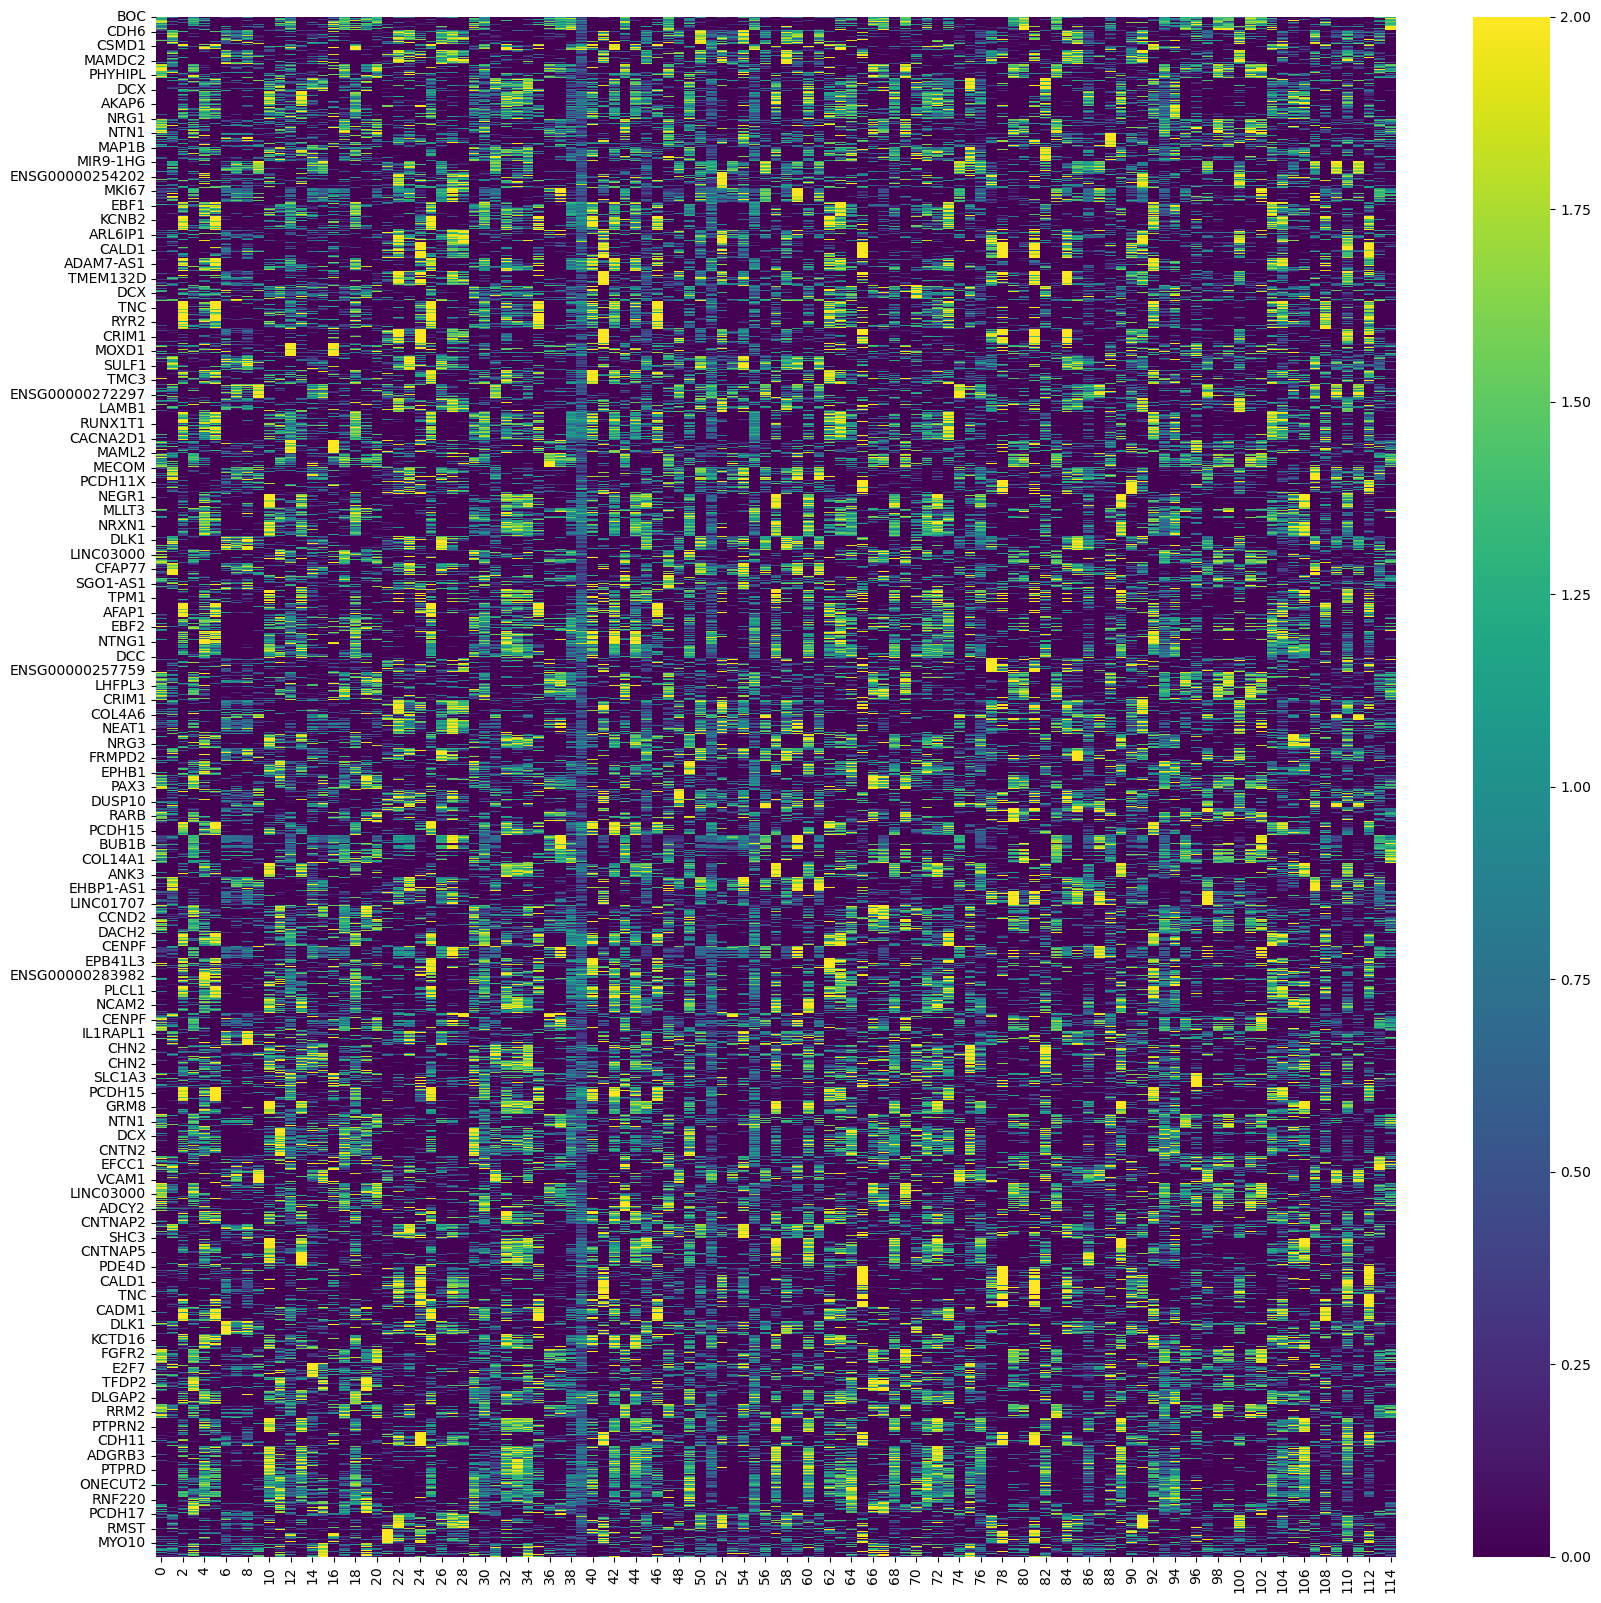

In [85]:
sorted_genes = genes_for_heatmap_sig
expr_plot = cluster_avg_logCPM.loc[sorted_genes].copy()
expr_plot_Z = (expr_plot.T-expr_plot.T.mean())/expr_plot.T.std()
expr_plot_Z = expr_plot_Z.dropna(axis=1)

plt.figure(figsize=(20,20))
sns.heatmap(expr_plot_Z.T,vmax=2,vmin=0,cmap='viridis')
#plt.savefig("figures/marker_genes/"+sample+"_final_clustering_heatmap_sig.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()

In [71]:
genes_for_heatmap

['BOC',
 'MIR99AHG',
 'HOXD3',
 'RFX4',
 'PRTG',
 'RHBDL3',
 'LINC03000',
 'PDE1A',
 'MLLT3',
 'PAX3',
 'DCC',
 'ENSG00000259692',
 'PDE4B',
 'CSRNP3',
 'ASXL3',
 'GRID2',
 'PVT1',
 'LRIG1',
 'PCLO',
 'LINC01473',
 'RMST',
 'CDH6',
 'ADAMTS18',
 'TRPM3',
 'WLS',
 'TMEM132D',
 'ERBB4',
 'SLIT2',
 'EFNA5',
 'GLIS3',
 'PCDH7',
 'NR2F1-AS1',
 'SHROOM3',
 'MMRN1',
 'MIR99AHG',
 'COL4A6',
 'FBN2',
 'NEBL',
 'ADGRL3',
 'KIAA1217',
 'SDK1',
 'PRKG1',
 'TALAM1',
 'THSD7B',
 'NAV2',
 'NRXN1',
 'CSMD1',
 'CNTNAP2',
 'SEMA6D',
 'KCNIP4',
 'DCC',
 'AKAP6',
 'NALF1',
 'CCSER1',
 'EBF1',
 'EGFEM1P',
 'CADM1',
 'THSD7A',
 'RBMS3',
 'CTNNA2',
 'EFNA5',
 'TRPM3',
 'PCDH7',
 'ADAMTS18',
 'KIAA1217',
 'RMST',
 'SLIT2',
 'GLIS3',
 'LAMB1',
 'CADPS2',
 'ADGRL3',
 'FBN2',
 'GPC6',
 'PCSK5',
 'B3GALT1',
 'NEBL',
 'LTBP1',
 'LRP2',
 'TIAM1',
 'PVT1',
 'LINC01414',
 'BOC',
 'PAX3',
 'NPAS3',
 'MIR99AHG',
 'FGF13',
 'LRIG1',
 'LINC03000',
 'LINC02306',
 'PAX7',
 'GRID2',
 'RFX4',
 'EGFEM1P',
 'ERBB4',
 'KIF21A',

<AxesSubplot: >

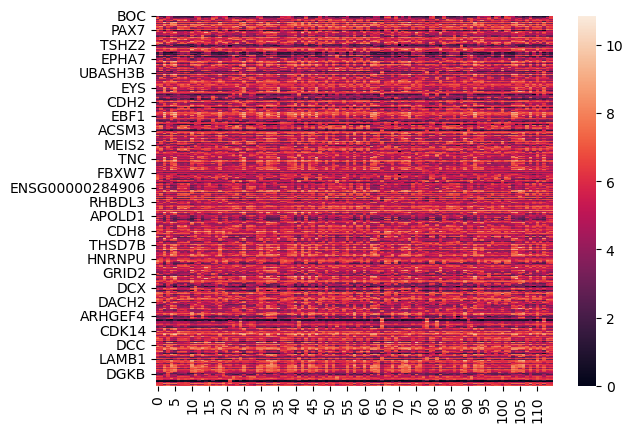

In [70]:
sns.heatmap(cluster_avg_logCPM.loc[genes_for_heatmap])

In [46]:
len(set(merged_exp.index))

60344

In [47]:
len(merged_exp.index)

60344

In [ ]:
parse_id_sum_expr_all

In [ ]:
	genotype	repl	sample	sums
	<chr>	<int>	<int>	<dbl>
Reproducibility_SC102A1_1_4	SC102A1	1	4	1040799
Reproducibility_SC102A1_1_9	SC102A1	1	9	2918046
Reproducibility_SC102A1_3_7	SC102A1	3	7	3436371
Reproducibility_SC102A1_2_12	SC102A1	2	12	695566
Reproducibility_SC102A1_3_8	SC102A1	3	

In [19]:
parse_id_sum_expr_pre

,p3_A1,p3_A10,p3_A11,p3_A12,p3_A2,p3_A3,p3_A4,p3_A5,p3_A6,p3_A7,...,p3_H11,p3_H12,p3_H2,p3_H3,p3_H4,p3_H5,p3_H6,p3_H7,p3_H8,p3_H9
TSPAN6,28.0,258.0,296.0,75.0,22.0,38.0,75.0,39.0,30.0,43.0,...,162.0,202.0,119.0,132.0,139.0,149.0,108.0,133.0,151.0,331.0
TNMD,4.0,0.0,1.0,1.0,1.0,17.0,7.0,0.0,5.0,1.0,...,2.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,2.0
DPM1,163.0,755.0,831.0,267.0,194.0,278.0,369.0,205.0,276.0,327.0,...,503.0,651.0,328.0,406.0,307.0,365.0,340.0,384.0,349.0,877.0
SCYL3,125.0,381.0,436.0,195.0,151.0,176.0,249.0,149.0,214.0,197.0,...,183.0,355.0,233.0,155.0,156.0,191.0,152.0,152.0,165.0,501.0
C1orf112,169.0,1495.0,1915.0,318.0,159.0,247.0,327.0,176.0,204.0,224.0,...,656.0,1197.0,731.0,541.0,486.0,457.0,514.0,526.0,582.0,1526.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000291313,1.0,1.0,3.0,0.0,2.0,0.0,1.0,2.0,1.0,0.0,...,2.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,5.0
ENSG00000291314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000291315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000291316,2.0,6.0,3.0,7.0,3.0,13.0,4.0,7.0,13.0,5.0,...,9.0,7.0,5.0,4.0,3.0,8.0,3.0,9.0,11.0,7.0
